# ch1. Numpy 복습
파이썬에서 과학 계산을 하기 위해 사용하는 라이브러리로 다차원 배열을 효율적으로 계산할 수 있습니다. pandas, scikit-learn,scipy 등의 많은 라이브러리들이 이 numpy를 기반으로 합니다. 또한 나중에 딥러닝을 공부할 때 필수적으로 tensor를 이해해야 하는데, numpy를 잘 알고 있으면 tensor를 이해하는 것이 수월합니다.

numpy는 약 1500여명의 개발자들이 참여했고, 160만명의 사람들이 사용하는 엄청난 프로젝트입니다. 이번 장에서는 numpy가 제공한다는 다차원 배열 연산이 무엇인지 알아보겠습니다.

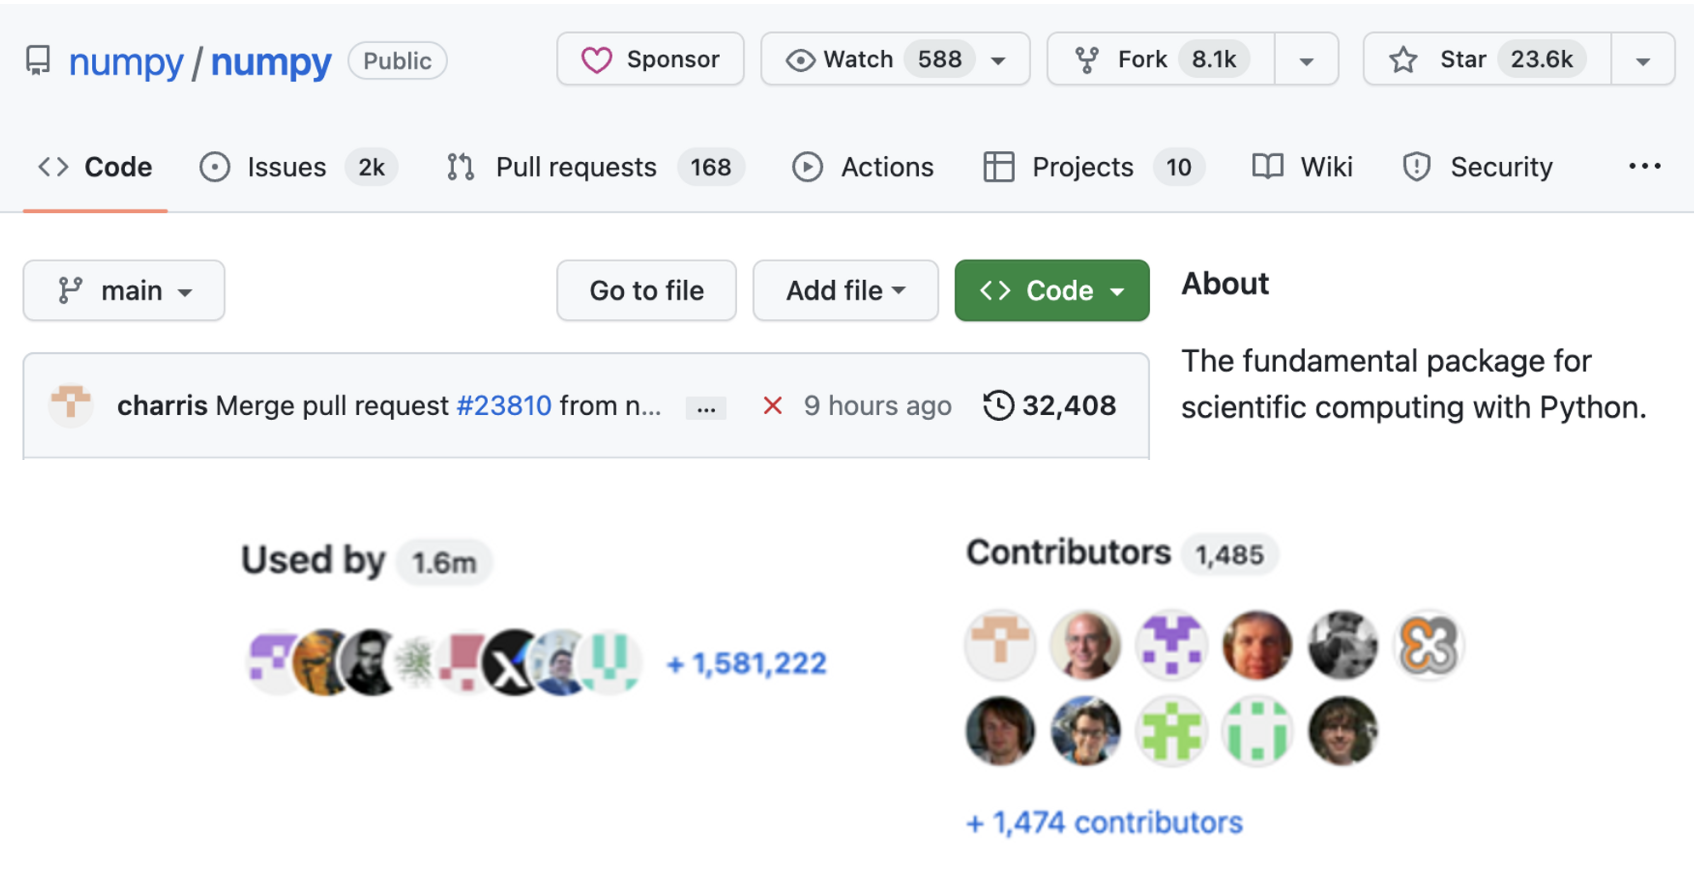

## 다차원 배열

### 다차원 배열 개념
python을 배우면서 list, 이중 list를 써본 적이 있을 겁니다.

In [2]:
nums_1d = [1, 2, 3, 4]

In [3]:
len(nums_1d)

4

In [4]:
nums_2d = [
    [2, 4, 6, 8, 10],
    [3, 6, 9, 12, 15],
    [4, 8, 12, 16, 20]
]

In [5]:
nums_2d[0][0]

2

다차원 배열이란 배열의 차원이 n개인 배열을 말합니다. 아래 같은 방식으로 배열의 차원은 무한대로 늘어날 수 있습니다.

In [6]:
nums_3d = [
    [
        [2, 4, 6, 8, 10],
        [3, 6, 9, 12, 15],
        [4, 8, 12, 16, 20]
    ],
    [
        [5, 10, 15, 20, 25],
        [6, 12, 18, 24, 30],
        [7, 14, 21, 28, 35]
    ]
]

In [8]:
nums_3d[1][2][3]

28

다차원 배열을 그림으로 표현하면 아래와 같습니다. 이 때, 1차원 배열은 vector, 2차원 배열은 matrix, 3차원 이상의 배열은 tensor라고도 부릅니다.

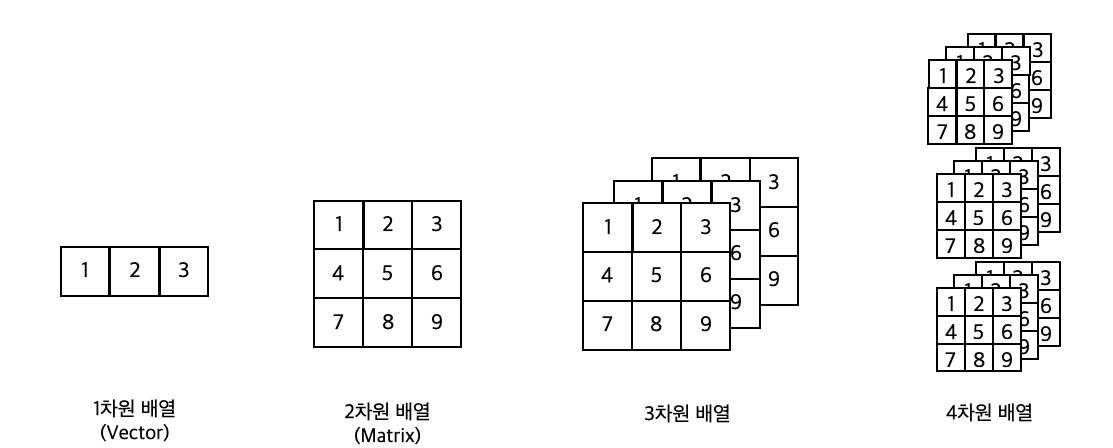

### 실생활에서의 다차원 배열
다차원 배열이 유용한 이유는 실생활의 많은 데이터들이 이런 다차원 배열로 표현될 수 있기 때문입니다. 대표적인 예시로 이미지가 있습니다. 이미지는 픽셀들이 이루고 있는 2차원 배열이고, 픽셀 하나는 RGB, 3가지 색상으로 표현될 수 있습니다. 즉, 이미지는 높이 x 너비 x 색상체널 크기의 3차원 배열입니다. 실제로 이미지가 3차원 배열로 표현되는지 확인해보겠습니다.

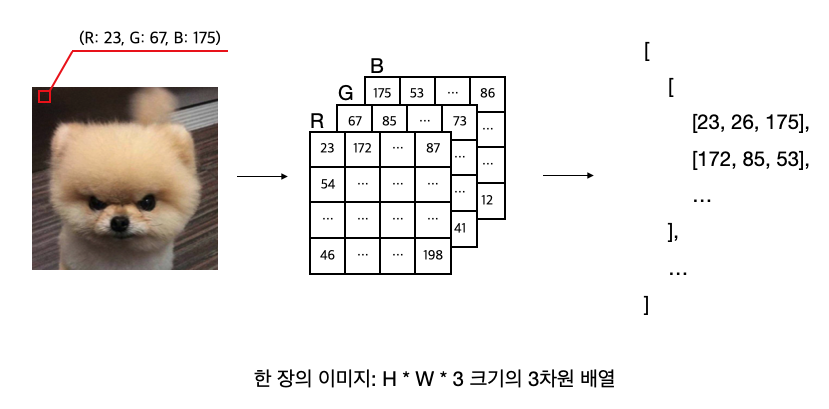

In [9]:
!pip install opencv-python

In [11]:
import cv2

In [13]:
img = cv2.imread("./example.jpg")

In [33]:
img

array([[[ 71,  70,  74],
        [ 65,  64,  68],
        [ 65,  62,  64],
        ...,
        [114, 148, 172],
        [112, 147, 173],
        [112, 149, 177]],

       [[ 84,  80,  85],
        [ 81,  78,  80],
        [ 82,  77,  79],
        ...,
        [106, 140, 164],
        [104, 141, 169],
        [103, 141, 171]],

       [[ 99,  94,  96],
        [ 99,  94,  95],
        [ 99,  93,  94],
        ...,
        [ 99, 134, 160],
        [ 96, 134, 164],
        [ 96, 135, 167]],

       ...,

       [[188, 205, 208],
        [187, 204, 207],
        [185, 204, 207],
        ...,
        [200, 160, 135],
        [202, 161, 136],
        [205, 164, 139]],

       [[189, 207, 208],
        [188, 206, 207],
        [187, 205, 206],
        ...,
        [191, 154, 128],
        [197, 157, 132],
        [198, 158, 133]],

       [[191, 209, 210],
        [189, 207, 208],
        [187, 205, 206],
        ...,
        [188, 151, 125],
        [196, 156, 131],
        [196, 156, 131]]

In [16]:
type(img), img.shape

(numpy.ndarray, (512, 512, 3))

In [17]:
from matplotlib import pyplot as plt

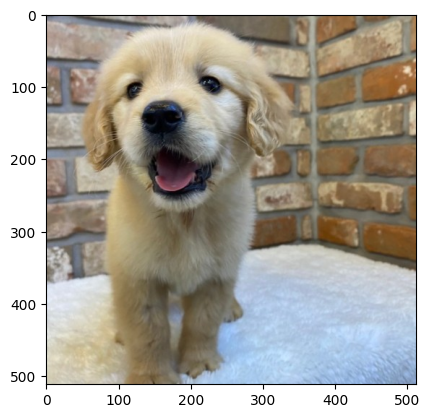

In [20]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### 다차원 배열의 계산
다차원 배열이 무엇인지, 그리고 실생활의 데이터가 다차원 배열로 어떻게 표현되는지 살펴보았습니다. 이번에는 numpy가 제공한다는 다차원 배열의 효율적인 연산이 무슨 의미인지 살펴보겠습니다.

먼저 다차원 배열 연산 중 가장 단순한 연산인 두 행렬의 곱셉을 살펴보겠습니다. 주어진 두 행렬을 곱하는 함수를 직접 한번 작성해보겠습니다. 

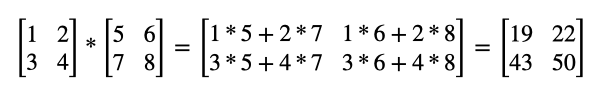

In [23]:
matrix_a = [
    [1, 2],
    [3, 4]
]

matrix_b = [
    [5, 6],
    [7, 8]
]

python을 이용하여 이를 구현하려면 무려 3중 for문을 사용해야합니다. 이는 매우 비효율적입니다.

In [24]:
def matmul(A, B):
    """
    A: n x m 행렬
    B: m x l 행렬
    C: A * B, n x l 행렬
    """
    n, m, l = len(A), len(A[0]), len(B[0])
    C = [[0 for x in range(n)] for y in range(l)]
    for i in range(n):
        for j in range(m):
            for k in range(l):
                C[i][j] += A[i][k]*B[k][j]
    return C

In [25]:
matmul(matrix_a, matrix_b)

[[19, 22], [43, 50]]

반면에 numpy를 이용할 경우, numpy에 내장된 matmul 함수를 이용할 수 있습니다. 또한 numpy의 백단은 C로 이루어져 있으며, 동시성 처리, 최적화 알고리즘들이 구현되어 있어 훨씬 효율적입니다.

In [27]:
import numpy as np

np.matmul(matrix_a, matrix_b)

array([[19, 22],
       [43, 50]])

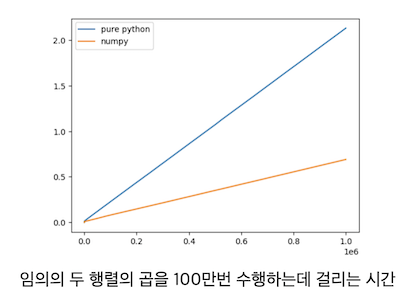

이 외에도 복잡한 데이터 분석을 수행하려면 훨씬 더 복잡한 다차원 배열 연산이 필요합니다.
- 다차원 배열간 곱셈, 행렬 제곱, 행렬 로그
- 다차원 배열의 형태 변환
- 다차원 배열의 내적, 외적,
- 다차원 배열의 미분 등

그럴 때마다 직접 이 복잡한 연산을 직접 구현하지 않고, numpy에 내장된 효율적인 함수들을 사용하면 됩니다.

## 심화 Numpy가 효율적인 이유
numpy를 이용한 연산이 효율적인 가장 근본적인 요인은 numpy가 사용하는 ndarray라는 자료구조 덕분입니다. 이는 python list와 비슷하게 다차원 배열을 저장할 수 있는 데이터 타입이지만, 내부 구현이 list와 다릅니다.

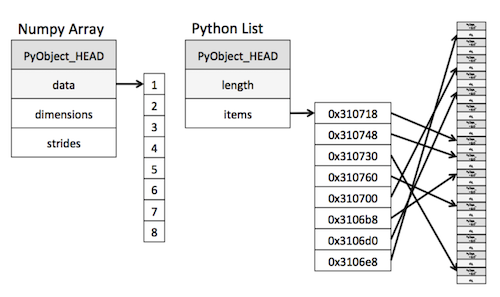

python list의 각 element는 모두 object입니다. python list는 각 object들의 메모리 주소만 가리키는 포인터들만 담고 있습니다. 때문에 다차원 배열 연산을 수행할 때, 일일이 포인터를 타고 원소에 접근해야하는 오버헤드가 있습니다.

In [28]:
example_list = [1, 2, "3", True]

In [29]:
example_list

[1, 2, '3', True]

In [30]:
for elem in example_list:
    print(elem, type(elem))

1 <class 'int'>
2 <class 'int'>
3 <class 'str'>
True <class 'bool'>


반면에 numpy의 ndarray는 하나의 ndarray에 하나의 데이터 타입만 담을 수 있습니다. 그리고 다차원 배열의 각 원소들을 일렬로 쫙 펼쳐서 연속적인 메모리 공간에 저장합니다. 때문에 접근해야할 인덱스만 알면 곧바로 해당 원소에 접근할 수 있어서 효율적입니다.

In [31]:
example_ndarray = np.array([1, 2, "3", True], dtype=np.int32)

In [32]:
for elem in example_ndarray:
    print(elem, type(elem))

1 <class 'numpy.int32'>
2 <class 'numpy.int32'>
3 <class 'numpy.int32'>
1 <class 'numpy.int32'>


그 밖에도 numpy를 이용한 다차원 배열 연산이 더 효율적인 요인을 찾으면 훨씬 더 많은 것들이 있습니다.
- 멀티 코어를 활용한 병렬 처리
- 메모리 상의 연속적인 공간에 데이터를 저장하여 캐쉬의 지역성 극대화
- 알고리즘 최적화

numpy와 관련된 내용들이 더 궁금하시다면 아래 영상을 참고하시면 좋습니다.  
https://www.youtube.com/watch?v=Dm2wkObQSas